In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten

Загрузка обучающей и тестовой выборок

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


Нормализация входных данных и преобразование выходных значений в векторы по категориям

In [6]:
x_train = x_train / 255
x_test = x_test / 255

y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

Отображение первых 25 изображений из обучающей выборки

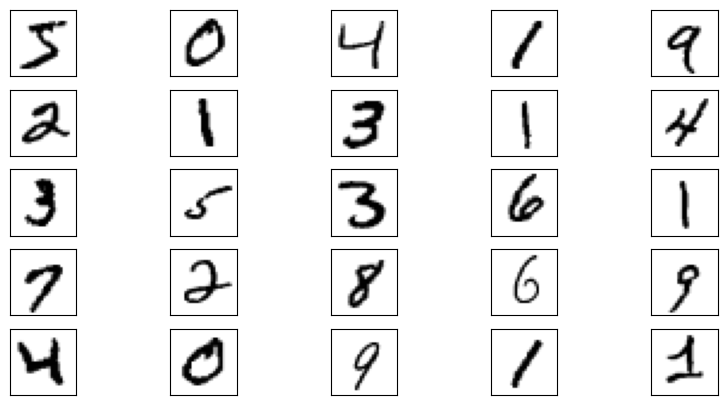

In [7]:
plt.figure(figsize=(10, 5))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap=plt.cm.binary)

plt.show()

Формирование модели нейронной сети и вывод её структуры в консоль

In [8]:
model = keras.Sequential([
    Flatten(input_shape = (28, 28, 1)),
    Dense(128, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Компиляция НС с оптимизацией по Adam и критерием - категориальная кросс-энтропия

In [9]:
model.compile(optimizer = "adam",
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

Запуск процесса обучения: 80% - обучающая выборка, 20% - валидационная выборка

In [12]:
model.fit(x_train, y_train_cat, batch_size = 32, epochs = 15, validation_split = 0.2)

Epoch 1/15
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3065 - accuracy: 0.9118 - val_loss: 0.2857 - val_accuracy: 0.9170
Epoch 2/15
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2952 - accuracy: 0.9147 - val_loss: 0.2785 - val_accuracy: 0.9187
Epoch 3/15
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2859 - accuracy: 0.9174 - val_loss: 0.2689 - val_accuracy: 0.9222
Epoch 4/15
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2774 - accuracy: 0.9204 - val_loss: 0.2606 - val_accuracy: 0.9255
Epoch 5/15
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2694 - accuracy: 0.9225 - val_loss: 0.2578 - val_accuracy: 0.9257
Epoch 6/15
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2621 - accuracy: 0.9243 - val_loss: 0.2475 - val_accuracy: 0.9285
Epoch 7/15
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2550 - accuracy: 0.9260 - val_loss: 0.2426 - val_accuracy:

In [13]:
model.evaluate(x_test, y_test_cat)

313/313 [==============================] - 1s 3ms/step - loss: 0.2040 - accuracy: 0.9418


[0.20395711064338684, 0.9417999982833862]

Проверка распознавания цифр

1/1 [==============================] - 0s 24ms/step
[[1.6020560e-05 1.2048036e-05 3.4990921e-05 9.2499852e-01 4.0231799e-07
  6.7188591e-02 5.8268910e-07 1.2266018e-05 7.1453126e-03 5.9118849e-04]]
Распознанная цифра: 3


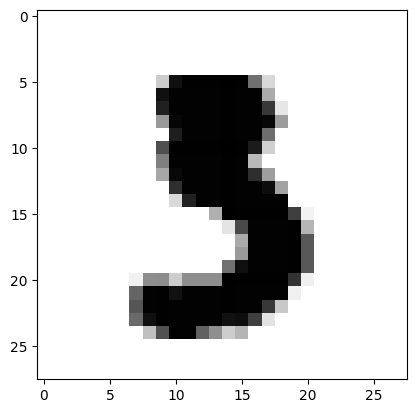

In [17]:
n = 450
x = np.expand_dims(x_test[n], axis = 0)
res = model.predict(x)
print(res)
print(f"Распознанная цифра: {np.argmax(res)}")

plt.imshow(x_test[n], cmap = plt.cm.binary)
plt.show()

Распознавание всей тестовой выборки

In [20]:
pred = model.predict(x_test)
pred = np.argmax(pred, axis = 1)

print(pred.shape)

print(pred[:20])
print(y_test[:20])

313/313 [==============================] - 1s 2ms/step
(10000,)
[7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


Выделение неверных результатов

In [26]:
mask = pred == y_test
print(mask[:10])

x_false = x_test[~mask]
p_false = pred[~mask]

print(x_false.shape)

[ True  True  True  True  True  True  True  True False  True]
(582, 28, 28)


Вывод первых 5 неверных результатов

Значение сети: 6


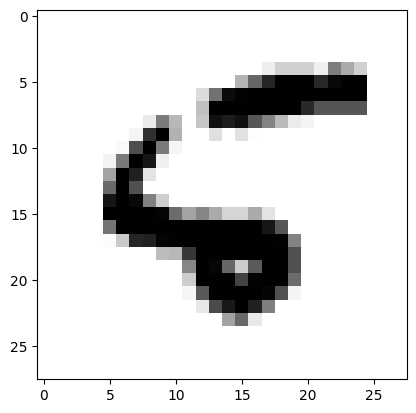

Значение сети: 0


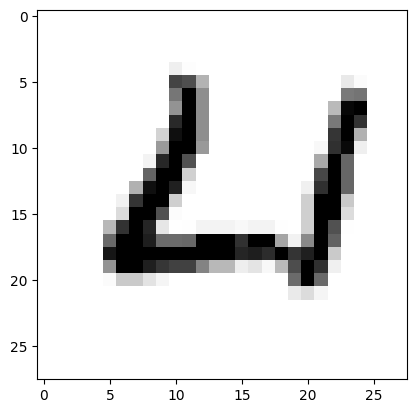

Значение сети: 4


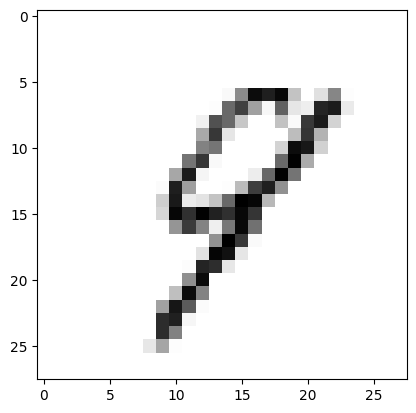

Значение сети: 4


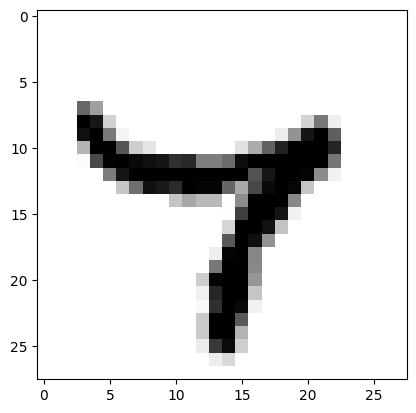

Значение сети: 9


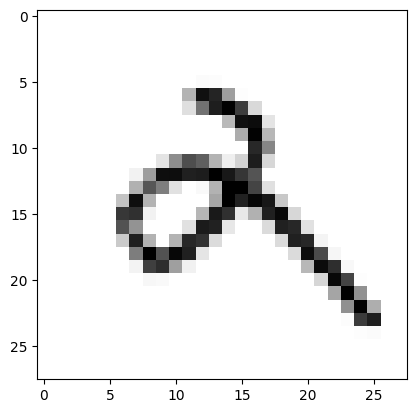

In [27]:
for i in range(5):
  print("Значение сети: " + str(p_false[i]))
  plt.imshow(x_false[i], cmap = plt.cm.binary)
  plt.show()